За да филтрираме слика во фреквенциски домен потребно е да ја помножиме сликата во фреквенцискидомен со филтерот (кернел) кој е исто така во фреквенциски домен.

$$I_{f,filt} = HI_f$$

За таа цел потребно е да се вметне Octave функција која ќе креира Band pass gaussian filter во фреквенциски домен. Bandpass гаусовиот филтер во фреквенциски домен е дефиниран со равенката.

$$ H(i,j) = e^{-\frac{d(i,j)^2}{f_h^2}} (1 - e^{-\frac{d(i,j)^2}{f_l^2}}) $$

Каде што 𝑑(𝑖,𝑗) е евклидовото растојанието на даден пиксел од центарот на сликата, додека 𝑓ℎ и 𝑓𝑙 се праговите на високите и ниските фреквенции кои сакаме да ги филтрираме. 
Конверзија на 2D сликата од просторен во фреквенциски домен се прави со користење на Фуриева трансформација. Фуриевата трансформација е дефинирана како:

$$ F(u,v) = \iint_{-\infty}^{\infty} f(x,y) e^{-i2\pi(ux + vy)} \,dx\,dy$$

А во дискретниот домен горната равенка може да биде преведена како

$$ F(u,v) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} f[m,n] \cdot e^{-i2\pi(umx_0 + vny_0)} $$

Конверзија на 2D сликата од фреквенциски во просторен домен се прави со користење на инверзна Фуриева трансформација. Инверзната Фуриева трансформација е дефинирана како:

$$ f(x,y) = \iint_{-\infty}^{\infty} F(u,v) e^{i2\pi(ux + vy)} \,du\,dv$$

А во дискретниот домен горната равенка може да биде преведена како

$$ f(x,y) = \sum_{m=-\infty}^{\infty} \sum_{n=-\infty}^{\infty} F(m,n) \cdot e^{i2\pi(xmu_0 + ynv_0)} $$


[[151 153 155 ...  70  79  85]
 [153 151 153 ...  80  92 107]
 [153 151 151 ... 109 118 125]
 ...
 [ 79  85  90 ... 111 111 107]
 [ 84  82  93 ... 107 109 110]
 [ 85  90  90 ... 103 105 106]]


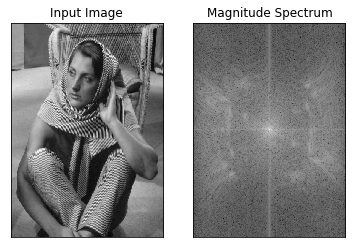

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

path = r'/Users/mariokrstevski/Downloads/Domasna_rabota_metodologija/Barbara.tif'
img = cv2.imread(path,0)
cv2.imshow('image', img) 

print(img)

img_float32 = np.float32(img)

dft = cv2.dft(img_float32, flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
%get --from Octave filtered_image 
%get --from Octave filter_kernel

import cv2
from matplotlib import pyplot as plt
%matplotlib notebook

# %matplotlib nbagg

#print(filtered_image)

slider_value=widgets.IntRangeSlider(
    value=[1, 2],
    min=0,
    max=10,
    step=1,
    description='Frequency:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

print(slider_value.value)

display(slider_value)

x = np.array(array_from_matlab)
matix[x,y]

def on_value_change(change):
    with output2:
        print(change['new'])
        
slider_value.observe(on_value_change, names='values')

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

np.reshape(x, (rows,cols)) 

# mask = np.zeros((rows,cols,2),np.uint8)
# mask[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 1


fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(x[slider.x,slider.y], cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Output image with universal IDFT'), plt.xticks([]), plt.yticks([])
plt.show()

Subkernel Octave does not support magic %put.
Subkernel Octave does not support magic %put.


NameError: name 'widgets' is not defined

In [1]:
%%file create_filter.m
function filter = create_filter(nx,ny,d0,d1)

filter = ones(nx,ny);

for i = 0:nx-1,
            for j = 0:ny-1
                 dist= sqrt((i-nx/2)^2 + (j-ny/2)^2);
                 filter(i+1,j+1) = exp(-dist^2/(2*(d1^2))).*(1.0-exp(-dist^2/(2*(d0^2))));
            end
end

filter(nx/2+1,ny/2+1)=1;
end

Created file '/Users/mariokrstevski/Documents/Projects/image-filtering/create_filter.m'.


In [3]:
%use octave

clear all
%read image
im = double(imread('Barbara.tif'));
%size of the image
[nx ny] = size(im);
%Transform the image from spatial to frequency domain
im_fft = fftshift(fft2(im));
% Create Gaussian bandpass kernels, in frequency domain, for 20 different cut off frequencies and filter the image
p=1;
for i = 1:10:101
q=1;
    for j = 1:10:101
        %Create the bandpass kernel
        tmp1 = create_filter(nx,ny,i,j);
        %Filter the image with the bandpass kernel and transform it back to spatial domain
        tmp = abs(ifft2(ifftshift(tmp1.*im_fft)));
        %Save the filtered image (in spatial domain) and kernel (in frequency domain) for visualization 
        filtered_image(p,q,:) = tmp(:);
        filter_kernel(p,q,:) = tmp1(:);
        q=q+1;
    end
    p=p+1;
end

%save -f filtered.py